# <center>ElecTweets</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-Librairies" data-toc-modified-id="Import-des-Librairies-1">Import des Librairies</a></span></li><li><span><a href="#Paramètres" data-toc-modified-id="Paramètres-2">Paramètres</a></span></li><li><span><a href="#Import-du-Dataset" data-toc-modified-id="Import-du-Dataset-3">Import du Dataset</a></span></li><li><span><a href="#Exploration-et-Analyse-du-Dataset" data-toc-modified-id="Exploration-et-Analyse-du-Dataset-4">Exploration et Analyse du Dataset</a></span><ul class="toc-item"><li><span><a href="#sexe" data-toc-modified-id="sexe-4.1"><code>sexe</code></a></span></li><li><span><a href="#compte_verifie" data-toc-modified-id="compte_verifie-4.2"><code>compte_verifie</code></a></span></li><li><span><a href="#sortant" data-toc-modified-id="sortant-4.3"><code>sortant</code></a></span></li><li><span><a href="#dissident" data-toc-modified-id="dissident-4.4"><code>dissident</code></a></span></li><li><span><a href="#nb_tweets" data-toc-modified-id="nb_tweets-4.5"><code>nb_tweets</code></a></span></li><li><span><a href="#likes" data-toc-modified-id="likes-4.6"><code>likes</code></a></span></li><li><span><a href="#retweets" data-toc-modified-id="retweets-4.7"><code>retweets</code></a></span></li><li><span><a href="#resultat_election" data-toc-modified-id="resultat_election-4.8"><code>resultat_election</code></a></span></li><li><span><a href="#Analyse-des-valeurs-manquantes" data-toc-modified-id="Analyse-des-valeurs-manquantes-4.9">Analyse des valeurs manquantes</a></span></li></ul></li><li><span><a href="#Préparation-du-Dataset" data-toc-modified-id="Préparation-du-Dataset-5">Préparation du Dataset</a></span><ul class="toc-item"><li><span><a href="#Suppression-des-observations-sans-valeur-cible" data-toc-modified-id="Suppression-des-observations-sans-valeur-cible-5.1">Suppression des observations sans valeur cible</a></span></li><li><span><a href="#Suppression-des-candidats-sans-compte-Twitter" data-toc-modified-id="Suppression-des-candidats-sans-compte-Twitter-5.2">Suppression des candidats sans compte Twitter</a></span></li><li><span><a href="#Suppression-des-variables-non-pertinentes" data-toc-modified-id="Suppression-des-variables-non-pertinentes-5.3">Suppression des variables non pertinentes</a></span></li><li><span><a href="#Séparation-de-la-colonne-cible" data-toc-modified-id="Séparation-de-la-colonne-cible-5.4">Séparation de la colonne cible</a></span></li><li><span><a href="#Constitution-des-jeux-d'entraînement-et-de-test" data-toc-modified-id="Constitution-des-jeux-d'entraînement-et-de-test-5.5">Constitution des jeux d'entraînement et de test</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes" data-toc-modified-id="Traitement-des-valeurs-manquantes-5.6">Traitement des valeurs manquantes</a></span><ul class="toc-item"><li><span><a href="#Valeurs-manquantes-dans-le-jeu-d'entraînement" data-toc-modified-id="Valeurs-manquantes-dans-le-jeu-d'entraînement-5.6.1">Valeurs manquantes dans le jeu d'entraînement</a></span></li><li><span><a href="#Valeurs-manquantes-dans-le-jeu-de-test" data-toc-modified-id="Valeurs-manquantes-dans-le-jeu-de-test-5.6.2">Valeurs manquantes dans le jeu de test</a></span></li><li><span><a href="#Suppression-des-colonnes-contenant-trop-de-valeurs-manquantes" data-toc-modified-id="Suppression-des-colonnes-contenant-trop-de-valeurs-manquantes-5.6.3">Suppression des colonnes contenant trop de valeurs manquantes</a></span></li><li><span><a href="#Suppression-des-colonnes-contenant-au-moins-une-valeur-manquante" data-toc-modified-id="Suppression-des-colonnes-contenant-au-moins-une-valeur-manquante-5.6.4">Suppression des colonnes contenant au moins une valeur manquante</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-5.7">Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Création-d'une-colonne-âge" data-toc-modified-id="Création-d'une-colonne-âge-5.7.1">Création d'une colonne <code>âge</code></a></span></li></ul></li><li><span><a href="#Conversion-des-types-des-colonnes" data-toc-modified-id="Conversion-des-types-des-colonnes-5.8">Conversion des types des colonnes</a></span></li><li><span><a href="#Création-du-preprocessor" data-toc-modified-id="Création-du-preprocessor-5.9">Création du preprocessor</a></span></li><li><span><a href="#Vérification-des-jeux-finaux" data-toc-modified-id="Vérification-des-jeux-finaux-5.10">Vérification des jeux finaux</a></span></li></ul></li><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-6">Modélisation</a></span><ul class="toc-item"><li><span><a href="#Définition-des-métriques" data-toc-modified-id="Définition-des-métriques-6.1">Définition des métriques</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.2">Decision Tree</a></span></li></ul></li></ul></div>

## Import des Librairies

In [96]:
import warnings
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, date
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Paramètres

In [63]:
pp = pprint.PrettyPrinter(indent=4)

sns.set_theme(style="whitegrid")
sns.color_palette()

pd.set_option("display.max_rows",150)
pd.set_option('display.max_columns', None)

## Import du Dataset

In [64]:
dates = [
    "date_naissance",
    "date_creation_compte",
    "date_premier_tour"
]

df = pd.read_csv('data/dataframe_to_use.csv', sep=";", parse_dates=dates)

## Exploration et Analyse du Dataset

In [65]:
df.head()

,id_candidat,prenom,nom,sexe,date_naissance,id_twitter,compte_verifie,date_creation_compte,annee_election,date_premier_tour,nom_annee_election,nom_derniere_election,sortant,dissident,parti_vainqueur_presidentielles,resultat_election,nb_tweets_elec_period,nb_tweets_reserve_period,nb_tweets_last_week,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,sum_likes_elec_period,max_likes_elec_period,avg_likes_elec_period,sum_likes_reserve_period,max_likes_reserve_period,avg_likes_reserve_period,sum_likes_last_week,max_likes_last_week,avg_likes_last_week,sum_likes_1st_concern,max_likes_1st_concern,avg_likes_1st_concern,sum_likes_2nd_concern,max_likes_2nd_concern,avg_likes_2nd_concern,sum_likes_3rd_concern,max_likes_3rd_concern,avg_likes_3rd_concern,sum_retweets_elec_period,max_retweets_elec_period,avg_retweets_elec_period,sum_retweets_reserve_period,max_retweets_reserve_period,avg_retweets_reserve_period,sum_retweets_last_week,max_retweets_last_week,avg_retweets_last_week,sum_retweets_1st_concern,max_retweets_1st_concern,avg_retweets_1st_concern,sum_retweets_2nd_concern,max_retweets_2nd_concern,avg_retweets_2nd_concern,sum_retweets_3rd_concern,max_retweets_3rd_concern,avg_retweets_3rd_concern
0,1,Sandrine,Adobati,F,1974-03-30,NaN,NaN,NaT,2022,2022-06-12,DIV,DIV,False,False,LREM,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Marie-Josee,Boulaire,F,1959-01-26,1.130170e+18,False,2019-05-01,2022,2022-06-12,RN,RN,False,False,LREM,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arnaud,Charvillat,M,1977-10-28,NaN,NaN,NaT,2022,2022-06-12,EXG,DXG,False,False,LREM,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,François-Marie,Didier,M,1980-10-03,1.207402e+18,False,2019-12-01,2022,2022-06-12,LR,LR,False,False,LREM,NaN,68,46,17,1,0,1,1910.0,291.0,28.0,1186.0,291.0,26.0,405.0,55.0,24.0,44.0,44.0,44.0,NaN,NaN,NaN,7.0,7.0,7.0,10679.0,8223.0,157.0,10352.0,8223.0,225.0,1574.0,962.0,93.0,27.0,27.0,27.0,NaN,NaN,NaN,0.0,0.0,0.0
4,5,Lamia,El Aaraje,F,1986-11-22,9.436728e+08,True,2012-11-01,2022,2022-06-12,SOC,NUPES,True,True,LREM,NaN,466,274,115,1,2,0,12458.0,1809.0,27.0,7103.0,1809.0,26.0,1749.0,216.0,15.0,27.0,27.0,27.0,153.0,101.0,77.0,NaN,NaN,NaN,24056.0,6671.0,52.0,18437.0,6671.0,67.0,4103.0,1306.0,36.0,15.0,15.0,15.0,73.0,43.0,37.0,NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_candidat                      45 non-null     int64         
 1   prenom                           45 non-null     object        
 2   nom                              45 non-null     object        
 3   sexe                             45 non-null     object        
 4   date_naissance                   44 non-null     datetime64[ns]
 5   id_twitter                       30 non-null     float64       
 6   compte_verifie                   30 non-null     object        
 7   date_creation_compte             30 non-null     datetime64[ns]
 8   annee_election                   45 non-null     int64         
 9   date_premier_tour                45 non-null     datetime64[ns]
 10  nom_annee_election               45 non-null     object        


### `sexe`

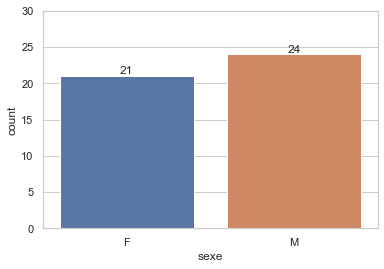

In [67]:
ax = sns.countplot(x="sexe", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 30])
plt.show()

### `compte_verifie`

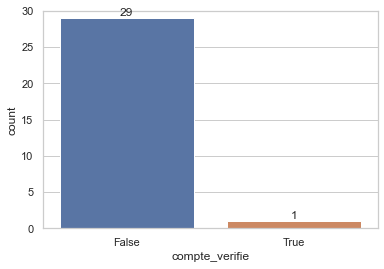

In [68]:
ax = sns.countplot(x="compte_verifie", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 30])
plt.show()

### `sortant`

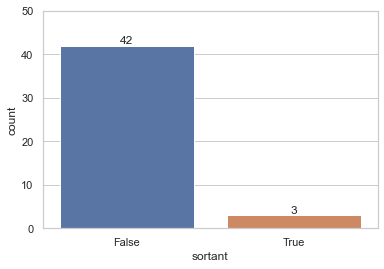

In [69]:
ax = sns.countplot(x="sortant", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 50])
plt.show()

### `dissident`

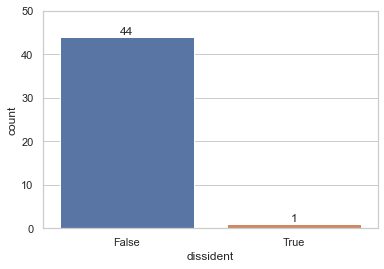

In [70]:
ax = sns.countplot(x="dissident", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 50])
plt.show()

### `nb_tweets`

### `likes`

### `retweets`

### `resultat_election`

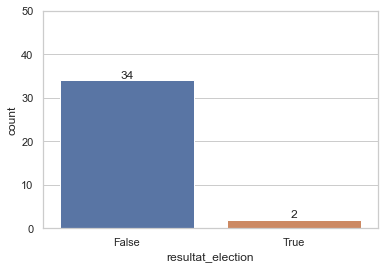

In [71]:
ax = sns.countplot(x="resultat_election", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 50])
plt.show()

### Analyse des valeurs manquantes

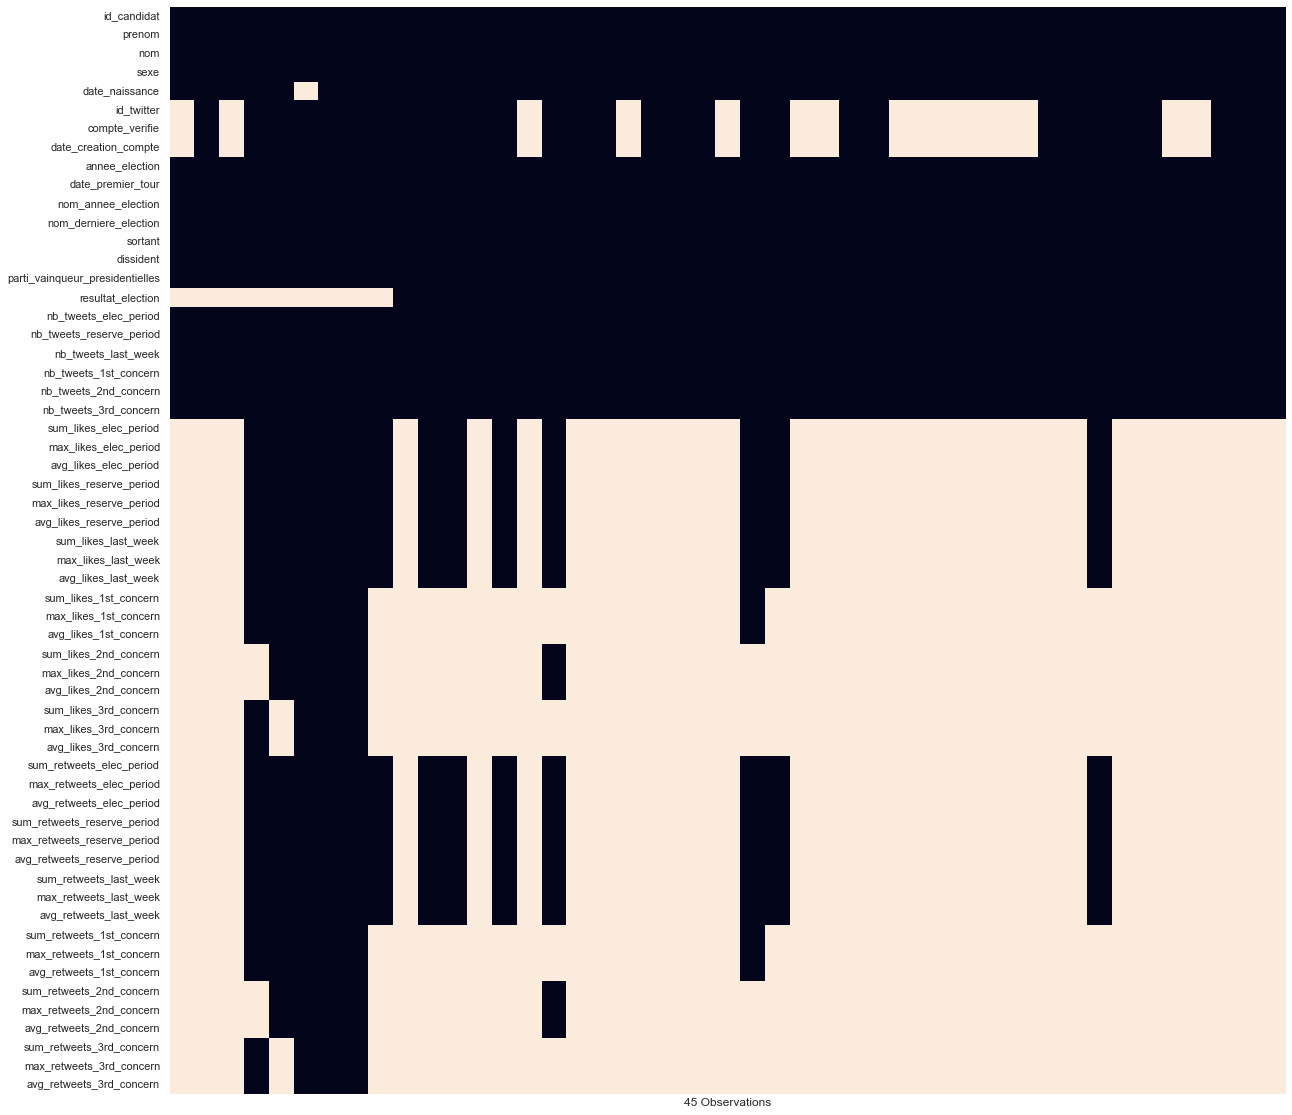

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(df)} Observations")
plt.show()

## Préparation du Dataset

### Suppression des observations sans valeur cible

In [73]:
length_before = len(df)
df.dropna(axis=0, how="any", subset="resultat_election", inplace=True)
df.reset_index(drop=True, inplace=True)
length_after = len(df)
n_dropped = length_before - length_after
print(f"Number of rows dropped: {n_dropped}")

Number of rows dropped: 9


### Suppression des candidats sans compte Twitter

In [74]:
n_0_before = df["resultat_election"].value_counts()[0]
n_1_before = df["resultat_election"].value_counts()[1]
n_rows_before = len(df)
df.dropna(axis=0, how="any", subset="id_twitter", inplace=True)
df.reset_index(drop=True, inplace=True)
n_0_after = df["resultat_election"].value_counts()[0]
n_1_after = df["resultat_election"].value_counts()[1]
n_rows_after = len(df)
n_0_dropped = n_0_before - n_0_after
n_1_dropped = n_1_before - n_1_after
n_rows_dropped = n_rows_before - n_rows_after
print(f"Number of rows dropped: {n_dropped} (of which {n_0_dropped}x 0 and {n_1_dropped}x 1)")

Number of rows dropped: 9 (of which 13x 0 and 0x 1)


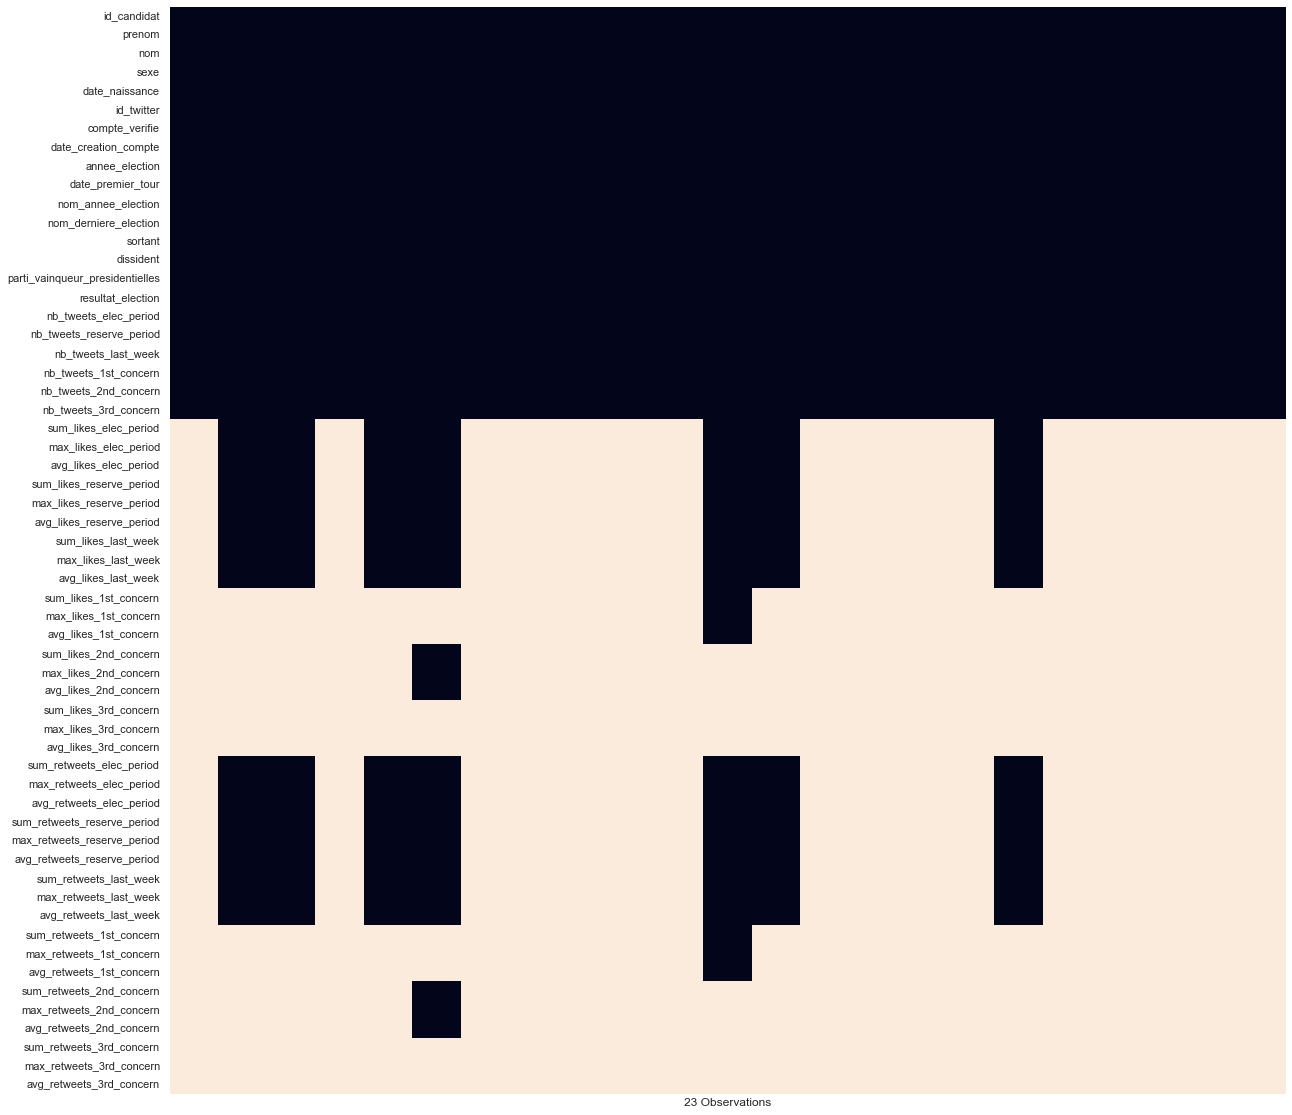

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(df)} Observations")
plt.show()

### Suppression des variables non pertinentes

In [76]:
df.drop([
    "prenom",
    "nom",
    "id_candidat",
    "id_twitter",
    "compte_verifie",
    "date_creation_compte",
    "annee_election",
    "date_premier_tour"
],
axis=1,
inplace=True
)

# Préparation du Dataset pour la Modélisation

### Séparation de la colonne cible

In [77]:
y = df["resultat_election"]
X = df[df.columns.difference(["resultat_election"])]

### Constitution des jeux d'entraînement et de test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [79]:
def y_details(y_train, y_test):
    y_train_vc = y_train.value_counts().values
    y_test_vc = y_test.value_counts().values
    y_vc = np.stack((y_train_vc, y_test_vc), axis=0)
    y_details = pd.DataFrame(data=y_vc, index=["Train", "Test"], columns=["0", "1"])
    y_details["Total"] = y_details["0"] + y_details["1"]
    return y_details

In [80]:
y_details(y_train, y_test)

,0,1,Total
Train,17,1,18
Test,4,1,5


### Traitement des valeurs manquantes

#### Valeurs manquantes dans le jeu d'entraînement

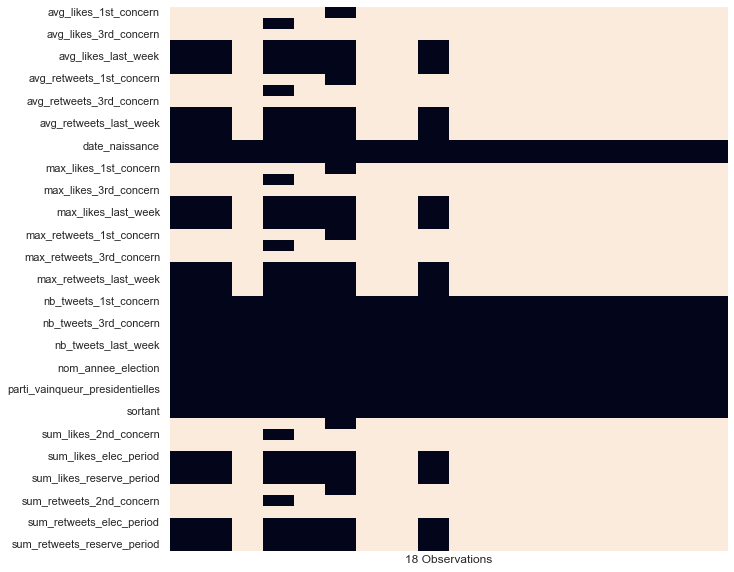

In [81]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(X_train)} Observations")
plt.show()

#### Valeurs manquantes dans le jeu de test

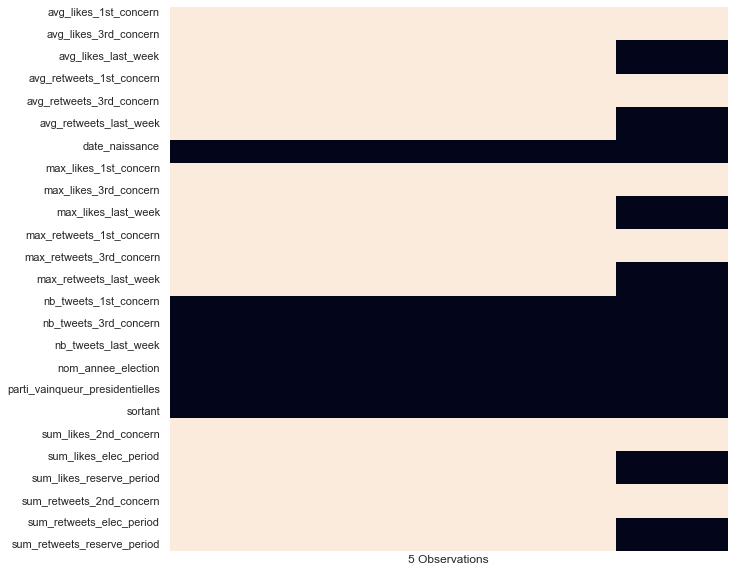

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_test.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(X_test)} Observations")
plt.show()

#### Suppression des colonnes contenant trop de valeurs manquantes

In [83]:
cols_to_drop = [
    
]

X_train.drop(labels=cols_to_drop, axis=1, inplace=True)
X_test.drop(labels=cols_to_drop, axis=1, inplace=True)

#### Suppression des colonnes contenant au moins une valeur manquante

In [84]:
n_cols_before = X_train.shape[1]
X_train.dropna(axis=1, how="any", inplace=True)
y_train = y_train[X_train.index]
n_cols_after = X_train.shape[1]
n_cols_dropped = n_cols_before - n_cols_after
print("Number of columns dropped: {}".format(n_cols_dropped))

Number of columns dropped: 36


In [85]:
n_cols_before = X_test.shape[1]
X_test.dropna(axis=1, how="any", inplace=True)
y_test = y_test[X_test.index]
n_cols_after = X_test.shape[1]
n_cols_dropped = n_cols_before - n_cols_after
print("Number of columns dropped: {}".format(n_cols_dropped))

Number of columns dropped: 36


### Feature engineering

#### Création d'une colonne `âge`

In [86]:
today = date.today()
# Jeu d'entraînement
X_train["age"] = X_train["date_naissance"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_train.drop(labels=["date_naissance"], axis=1, inplace=True)
# Jeu de test
X_test["age"] = X_test["date_naissance"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_test.drop(labels=["date_naissance"], axis=1, inplace=True)

### Conversion des types des colonnes

In [87]:
# Jeu d'entraînement
X_train.loc[:, X_train.dtypes=="object"] = X_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))
y_train = y_train.astype('int')

# Jeu de test
X_test.loc[:, X_test.dtypes=="object"] = X_test.select_dtypes(['object']).apply(lambda x: x.astype('category'))
y_test = y_test.astype('int')

### Création du preprocessor

In [88]:
# Opérations de transformation pour les variables catégorielles
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="first")

# Variables catégorielles
categorical_features = X_train.select_dtypes(["category"]).columns

# Instantiation du pré-processeur
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

### Vérification des jeux finaux

In [104]:
# Vérification de la sortie du preprocessor pour le jeu d'entraînement
features = preprocessor.fit(X_train).get_feature_names_out()
features = [feature.split("__")[1] for feature in features]
pd.DataFrame(preprocessor.transform(X_train), columns=features).head(5)

,nom_annee_election_AUT,nom_annee_election_COM,nom_annee_election_DIV,nom_annee_election_DVD,nom_annee_election_ECO,nom_annee_election_EXG,nom_annee_election_FG,nom_annee_election_FI,nom_annee_election_PRV,nom_annee_election_RDG,nom_annee_election_SOC,nom_annee_election_UMP,nom_annee_election_VEC,nom_derniere_election_DIV,nom_derniere_election_DVD,nom_derniere_election_DXG,nom_derniere_election_ECO,nom_derniere_election_LR,nom_derniere_election_NUPES,nom_derniere_election_PRV,nom_derniere_election_RDG,parti_vainqueur_presidentielles_LREM,parti_vainqueur_presidentielles_PS,sexe_F,sexe_M,dissident,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,nb_tweets_elec_period,nb_tweets_last_week,nb_tweets_reserve_period,sortant,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,False,0,0,0,31,19,31,False,43
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False,0,0,0,106,26,72,False,65
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,False,0,0,0,0,0,0,False,56
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,False,0,4,0,162,84,148,False,50
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False,0,0,0,59,17,34,False,31


In [106]:
pd.DataFrame(preprocessor.transform(X_train), columns=features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   nom_annee_election_AUT                18 non-null     object
 1   nom_annee_election_COM                18 non-null     object
 2   nom_annee_election_DIV                18 non-null     object
 3   nom_annee_election_DVD                18 non-null     object
 4   nom_annee_election_ECO                18 non-null     object
 5   nom_annee_election_EXG                18 non-null     object
 6   nom_annee_election_FG                 18 non-null     object
 7   nom_annee_election_FI                 18 non-null     object
 8   nom_annee_election_PRV                18 non-null     object
 9   nom_annee_election_RDG                18 non-null     object
 10  nom_annee_election_SOC                18 non-null     object
 11  nom_annee_election_UMP            

In [107]:
# Vérification de la sortie du preprocessor pour le jeu de test
features = preprocessor.fit(X_test).get_feature_names_out()
features = [feature.split("__")[1] for feature in features]
pd.DataFrame(preprocessor.transform(X_test), columns=features).head(5)

,nom_annee_election_CEN,nom_annee_election_ECO,nom_annee_election_FN,nom_annee_election_LR,nom_annee_election_SOC,nom_derniere_election_ECO,nom_derniere_election_LR,nom_derniere_election_MDM,nom_derniere_election_NUPES,nom_derniere_election_RN,parti_vainqueur_presidentielles_LREM,parti_vainqueur_presidentielles_PS,sexe_F,sexe_M,dissident,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,nb_tweets_elec_period,nb_tweets_last_week,nb_tweets_reserve_period,sortant,age
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,False,0,0,0,0,0,0,False,73
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False,0,0,0,0,0,0,False,52
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False,0,0,0,0,0,0,False,26
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False,0,0,0,0,0,0,False,57
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,False,0,0,0,92,39,81,False,36


In [108]:
pd.DataFrame(preprocessor.transform(X_test), columns=features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   nom_annee_election_CEN                5 non-null      object
 1   nom_annee_election_ECO                5 non-null      object
 2   nom_annee_election_FN                 5 non-null      object
 3   nom_annee_election_LR                 5 non-null      object
 4   nom_annee_election_SOC                5 non-null      object
 5   nom_derniere_election_ECO             5 non-null      object
 6   nom_derniere_election_LR              5 non-null      object
 7   nom_derniere_election_MDM             5 non-null      object
 8   nom_derniere_election_NUPES           5 non-null      object
 9   nom_derniere_election_RN              5 non-null      object
 10  parti_vainqueur_presidentielles_LREM  5 non-null      object
 11  parti_vainqueur_presidentielles_PS  

## Modélisation

### Définition des métriques

In [97]:
def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

### Decision Tree

In [92]:
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier()),
])

In [93]:
dt_params_grid = {
    "model__splitter": ["best", "random"],
    "model__max_depth": [2, 3, 5, 10, 15, 20, 30],
    "model__min_samples_split": [5, 10, 20, 30, 40],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__max_features": ["auto", "sqrt", "log2"],
    "model__class_weight": ["balanced"]
}

pp.pprint(dt_params_grid)

total_conf = 1
for _, value in dt_params_grid.items():
    if isinstance(value, list):
        total_conf *= len(value)

print("\n")
print(f"Nombre de configurations à tester : {total_conf}")

{   'model__class_weight': ['balanced'],
    'model__max_depth': [2, 3, 5, 10, 15, 20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__min_samples_split': [5, 10, 20, 30, 40],
    'model__splitter': ['best', 'random']}


Nombre de configurations à tester : 840


In [94]:
dt_grid_search = GridSearchCV(
                                    estimator=dt_pipeline, 
                                    param_grid=dt_params_grid,
                                    cv=5,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=6
                                )

dt_grid_search.fit(X_train, y_train)
print(f"Best score: {round(dt_grid_search.best_score_, 2)}")
pp.pprint(dt_grid_search.best_params_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best score: 0.95
{   'model__class_weight': 'balanced',
    'model__max_depth': 3,
    'model__max_features': 'log2',
    'model__min_samples_leaf': 2,
    'model__min_samples_split': 5,
    'model__splitter': 'random'}


In [99]:
pred_train = dt_grid_search.predict(X_train)
pred_test = dt_grid_search.predict(X_test)

print("Classification metrics for train data")
print(classification_metrics(y_train, pred_train))
print("\n")
print("Classification metrics for test data")
print(classification_metrics(y_test, pred_test))

Classification metrics for train data
   accuracy_score  f1_score  precision_score  recall_score
0        0.944444       0.0              0.0           0.0


Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0             0.8       0.0              0.0           0.0


/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


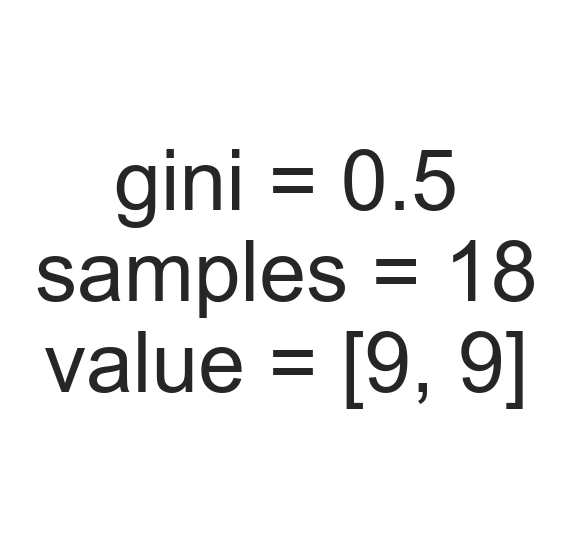

In [100]:
feature_names = dt_grid_search.best_estimator_.named_steps["preprocessor"].get_feature_names_out().tolist()

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt_grid_search.best_estimator_["model"], feature_names=feature_names, ax=ax)
plt.show()